<a href="https://colab.research.google.com/github/DarshiniSivakumar/CODSOFT/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fraudTest.csv.zip to fraudTest.csv.zip


In [ ]:
import pandas as pd
df = pd.read_csv("fraudTest.csv.zip", encoding="latin-1")
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [ ]:
import zipfile
import pandas as pd

with zipfile.ZipFile("fraudTest.csv.zip", "r") as zip_ref:
    zip_ref.extractall(".")

import os
print(os.listdir())

df = pd.read_csv("fraudTest.csv")
print(df.head())


['.config', 'fraudTest.csv.zip', 'fraudTest.csv', 'sample_data']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355 

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

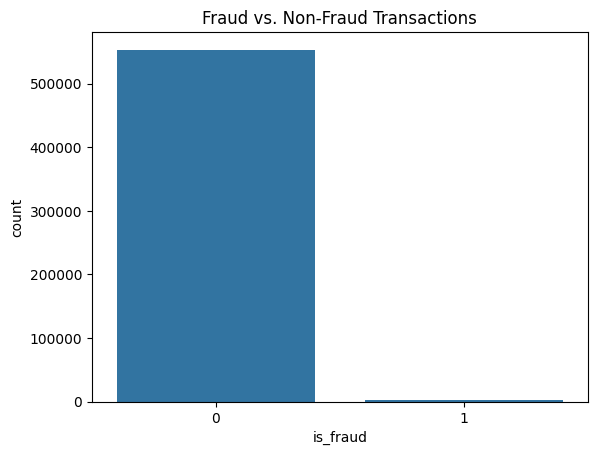

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


with zipfile.ZipFile("fraudTest.csv.zip", "r") as zip_ref:
    zip_ref.extractall(".")
df = pd.read_csv("fraudTest.csv")
print(df.head())
df.drop(columns=["Unnamed: 0", "trans_date_trans_time", "cc_num", "first", "last", "street", "city", "state",
                 "zip", "job", "dob", "trans_num"], inplace=True)
categorical_cols = ["merchant", "category", "gender"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]
scaler = StandardScaler()
X[["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"]] = scaler.fit_transform(
    X[["amt", "lat", "long", "city_pop", "unix_time", "merch_lat", "merch_long"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n📊 Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n🔎 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.countplot(x=df["is_fraud"])
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()